This document covers:

* Creating grids of subplots using `plt.subplots(nrows, ncols)`.
* Accessing and plotting on individual `Axes` objects within the returned array.
* Sharing x or y axes between subplots using `sharex`/`sharey` arguments.
* Briefly mentioning more complex layout options like `GridSpec` and `fig.add_subplot()`.
* Adjusting the spacing between subplots using `plt.tight_layout()` or `plt.subplots_adjust()`.

This allows you to create well-organized figures containing multiple related visualizations.

--- Creating Subplot Grids ---
Figure: Figure(1000x400)
Axes array (axs): [<Axes: > <Axes: >]
Shape of axs: (2,)


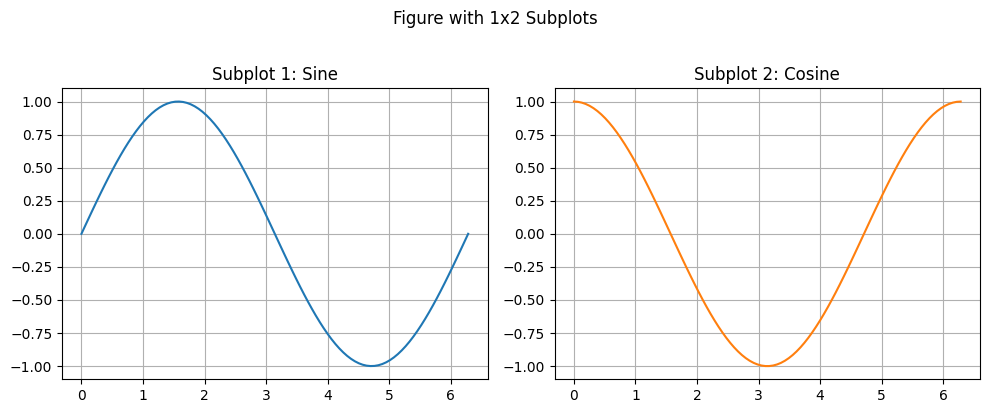

Generated 1x2 subplot grid.
--------------------
Axes array (axs) for 2x2 grid:
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
Shape of axs: (2, 2)


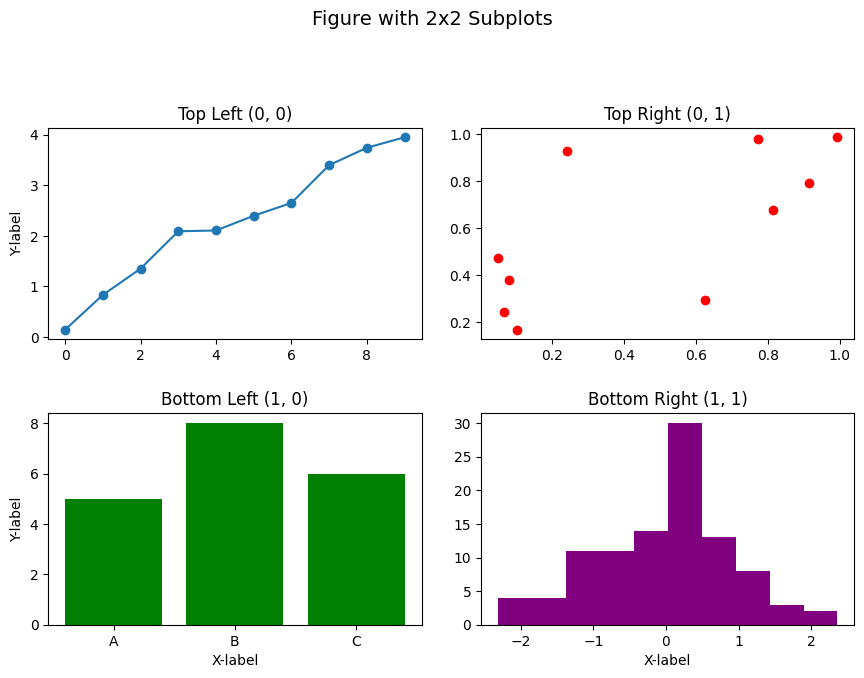

Generated 2x2 subplot grid.
------------------------------
--- Sharing Axes ---


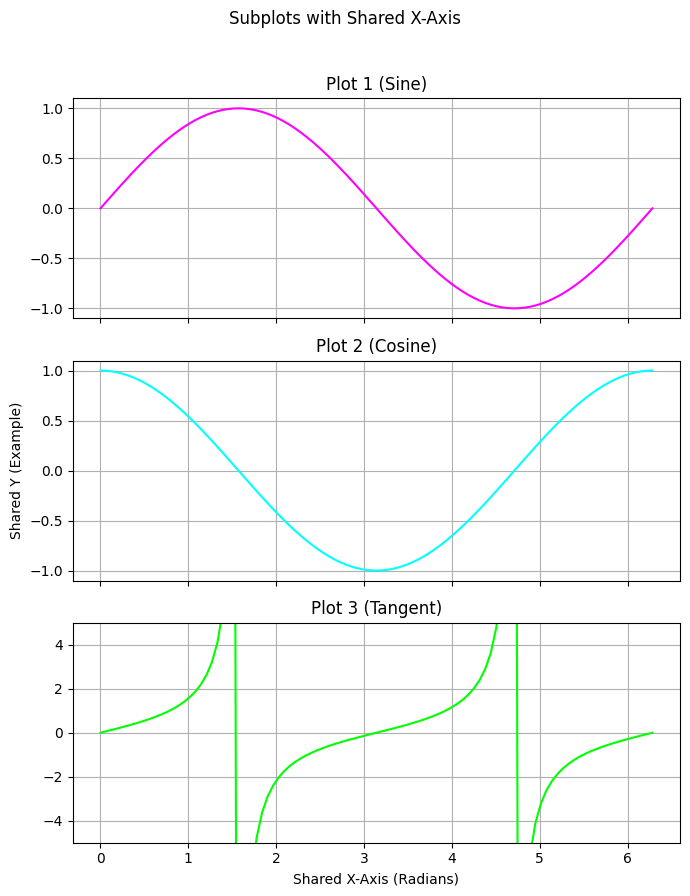

Generated 3x1 subplots sharing X-axis.
------------------------------
--- Complex Layouts (Conceptual) ---
More complex layouts possible with GridSpec or fig.add_subplot().
------------------------------
--- Adjusting Layout ---


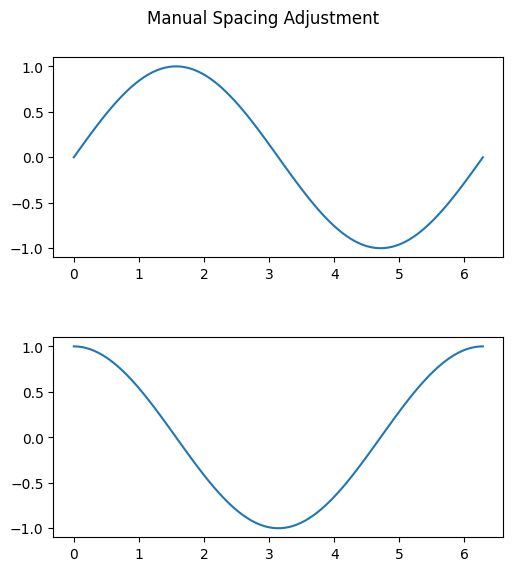

Generated plot with manual spacing via subplots_adjust.
------------------------------


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Using plt.subplots() for Grids ---
# plt.subplots(nrows, ncols, ...) is the primary tool.
# It returns a Figure object and an array (or single object) of Axes objects.

print("--- Creating Subplot Grids ---")

# a) Simple 1x2 grid (1 row, 2 columns)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) # axs is a 1D array

print(f"Figure: {fig}")
print(f"Axes array (axs): {axs}")
print(f"Shape of axs: {axs.shape}")

# Access axes by index
ax1 = axs[0]
ax2 = axs[1]

# Plot on the first axes
x = np.linspace(0, 2 * np.pi, 100)
ax1.plot(x, np.sin(x), color='tab:blue')
ax1.set_title('Subplot 1: Sine')
ax1.grid(True)

# Plot on the second axes
ax2.plot(x, np.cos(x), color='tab:orange')
ax2.set_title('Subplot 2: Cosine')
ax2.grid(True)

fig.suptitle('Figure with 1x2 Subplots', y=1.02) # Add overall title
plt.tight_layout() # Adjust spacing
plt.show()
print("Generated 1x2 subplot grid.")
print("-" * 20)

# b) 2x2 grid (axs is a 2D NumPy array)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))

print(f"Axes array (axs) for 2x2 grid:\n{axs}")
print(f"Shape of axs: {axs.shape}")

# Access axes by [row, col] index
axs[0, 0].plot(np.random.rand(10).cumsum(), marker='o')
axs[0, 0].set_title('Top Left (0, 0)')

axs[0, 1].scatter(np.random.rand(10), np.random.rand(10), color='red')
axs[0, 1].set_title('Top Right (0, 1)')

axs[1, 0].bar(['A', 'B', 'C'], np.random.randint(1, 10, 3), color='green')
axs[1, 0].set_title('Bottom Left (1, 0)')

axs[1, 1].hist(np.random.randn(100), bins=10, color='purple')
axs[1, 1].set_title('Bottom Right (1, 1)')

# Add labels only to edge plots if desired
for ax in axs[1, :]: # Bottom row
    ax.set_xlabel('X-label')
for ax in axs[:, 0]: # Left column
    ax.set_ylabel('Y-label')

fig.suptitle('Figure with 2x2 Subplots', fontsize=14)
plt.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95]) # Add padding and make room for suptitle
plt.show()
print("Generated 2x2 subplot grid.")
print("-" * 30)


# --- 2. Sharing Axes ---
# Use sharex=True or sharey=True in plt.subplots()
# Useful when plots have the same scale on an axis.

print("--- Sharing Axes ---")

# Share X axis for plots stacked vertically
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 9), sharex=True)

axs[0].plot(x, np.sin(x), color='magenta')
axs[0].set_title('Plot 1 (Sine)')
axs[0].grid(True)

axs[1].plot(x, np.cos(x), color='cyan')
axs[1].set_title('Plot 2 (Cosine)')
axs[1].grid(True)
axs[1].set_ylabel('Shared Y (Example)') # Only need one y-label if scales differ

axs[2].plot(x, np.tan(x), color='lime')
axs[2].set_title('Plot 3 (Tangent)')
axs[2].set_ylim(-5, 5) # Tangent goes to infinity, limit y-axis
axs[2].grid(True)
axs[2].set_xlabel('Shared X-Axis (Radians)') # Only need one x-label

fig.suptitle('Subplots with Shared X-Axis', y=0.99)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
print("Generated 3x1 subplots sharing X-axis.")

# Share Y axis for plots arranged horizontally
# fig, axs = plt.subplots(1, 2, sharey=True)
# ...
print("-" * 30)


# --- 3. More Complex Layouts (Brief Mention) ---
# For non-uniform grids, use plt.GridSpec or fig.add_subplot().

print("--- Complex Layouts (Conceptual) ---")
# Example using fig.add_subplot()
# fig = plt.figure(figsize=(8, 6))
# ax_big = fig.add_subplot(1, 1, 1) # Background axes (or main plot)
# ax_small1 = fig.add_subplot(2, 3, 1) # 2 rows, 3 cols, plot #1
# ax_small2 = fig.add_subplot(2, 3, 6) # 2 rows, 3 cols, plot #6
# ax_big.plot(x, x**2, color='gray', alpha=0.3)
# ax_small1.plot(x, np.sin(x))
# ax_small2.hist(np.random.randn(50))
# ax_big.set_title("Complex Layout using fig.add_subplot()")
# plt.show()

# Example using GridSpec
# from matplotlib.gridspec import GridSpec
# fig = plt.figure(figsize=(8, 6))
# gs = GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[2, 1]) # Define grid structure
# ax1 = fig.add_subplot(gs[0, 0]) # Top left
# ax2 = fig.add_subplot(gs[0, 1]) # Top right (wider)
# ax3 = fig.add_subplot(gs[1, :]) # Bottom row (spans both columns)
# ax1.text(0.5, 0.5, 'ax1', ha='center', va='center')
# ax2.text(0.5, 0.5, 'ax2', ha='center', va='center')
# ax3.text(0.5, 0.5, 'ax3', ha='center', va='center')
# fig.suptitle("Complex Layout using GridSpec")
# plt.tight_layout()
# plt.show()
print("More complex layouts possible with GridSpec or fig.add_subplot().")
print("-" * 30)


# --- 4. Adjusting Layout ---
# - plt.tight_layout() / fig.tight_layout(): Automatically adjusts padding between subplots.
# - plt.subplots_adjust(left=..., right=..., bottom=..., top=..., wspace=..., hspace=...):
#   Manually fine-tune spacing (values are fractions of figure width/height).

print("--- Adjusting Layout ---")
# We used plt.tight_layout() in previous examples.

# Example of manual adjustment (can be fiddly)
fig, axs = plt.subplots(2, 1, figsize=(6, 6))
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x))
fig.suptitle("Manual Spacing Adjustment")

# Adjust bottom margin, top margin, and height space between plots
plt.subplots_adjust(left=0.15, right=0.9, bottom=0.1, top=0.9, hspace=0.4)

plt.show()
print("Generated plot with manual spacing via subplots_adjust.")
print("-" * 30)